## Data Loading and Initial Inspection

In this section, we load the dataset and perform an initial inspection to understand its structure. The dataset contains tweets about various devices and the associated emotions directed at those devices. Our goal is to use this data for sentiment classification.

### Dataset Description:
The dataset consists of the following columns:
1. **text**: The content of the tweet.
2. **target_device**: The device or product the tweet is directed at (e.g., iPhone, iPad).
3. **emotion**: The sentiment expressed in the tweet, labeled as "Positive emotion", "Negative emotion", or "Neutral emotion".

### Steps:
1. **Load the dataset**: We load the dataset using pandas and check the first few rows to verify that the data has been loaded correctly.
2. **Renaming columns**: We rename the columns for easier handling.
3. **Explore basic statistics**: We will explore the structure and content of the dataset to understand its properties.


In [2]:
import pandas as pd

# data loading
file_url = 'https://raw.githubusercontent.com/George-Chira/twitter-sentiment-analysis/main/data/judge-1377884607_tweet_product_company.csv'
df = pd.read_csv(file_url, encoding='ISO-8859-1')

# Display the first few rows to verify
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# Renaming columns to shorter names
df_tweets = df.rename(columns={
    'tweet_text': 'text',
    'emotion_in_tweet_is_directed_at': 'target_device',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'
})

# Verify the renaming
df_tweets.head(5)


,text,target_device,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           9092 non-null   object
 1   target_device  3291 non-null   object
 2   emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


check for missing values 

## Data Exploration

Before proceeding with data preprocessing and model building, it's essential to explore the dataset to understand its structure and content. This step helps identify missing data, analyze the distribution of sentiment labels, and inspect the raw text.

### Key Steps:
1. **Check for missing data**: We ensure there are no missing values in the key columns (`text`, `target_device`, and `emotion`).
2. **Examine the distribution of sentiment labels**: This will help us understand whether the data is balanced or imbalanced, which will influence the choice of modeling techniques and evaluation metrics.
3. **Sample inspection**: By reviewing a few sample tweets, we can plan the necessary text preprocessing steps (e.g., removing URLs, mentions, and hashtags).


In [5]:
# Check for missing values
print("Missing values before handling:\n", df_tweets.isnull().sum())

Missing values before handling:
 text                1
target_device    5802
emotion             0
dtype: int64


In [6]:
# Check for missing values
print(r"Missing values:\n", df_tweets.isnull().sum())

# Check distribution of sentiment labels
print(r" Distribution of sentiment labels:\n ", df_tweets['emotion'].value_counts())

# Display sample tweets
print(r" \n Sample tweets:\n", df_tweets['text'].head(5))

# Display sample tweets
print(r"\ntarget_device:\n", df_tweets['target_device'].head(5))

Missing values:\n text                1
target_device    5802
emotion             0
dtype: int64
 Distribution of sentiment labels:\n  emotion
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64
 \n Sample tweets:\n 0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: text, dtype: object
\ntarget_device:\n 0                iPhone
1    iPad or iPhone App
2                  iPad
3    iPad or iPhone App
4                Google
Name: target_device, dtype: object


### Handling Missing Values

1. Any missing values in the **`target_device`** column are filled with the placeholder value **'Unknown'**. This ensures that missing device information does not result in the exclusion of otherwise useful data.

2. Any rows where the tweet **`text`**  is missing are dropped from the dataset. Tweets without content cannot be used for sentiment analysis.
After applying these steps, we verify that there are no missing values in the dataset.


In [7]:
#fill missing in the target devise with a placeholder "unknown"
df_tweets['target_device'].fillna('Unknown'  , inplace= True)
#drop missing values in text
df_tweets.dropna(subset=['text'], inplace=True)

#verify cleaning 
print("missing values after cleaning:", df_tweets.isna().sum())



missing values after cleaning: text             0
target_device    0
emotion          0
dtype: int64


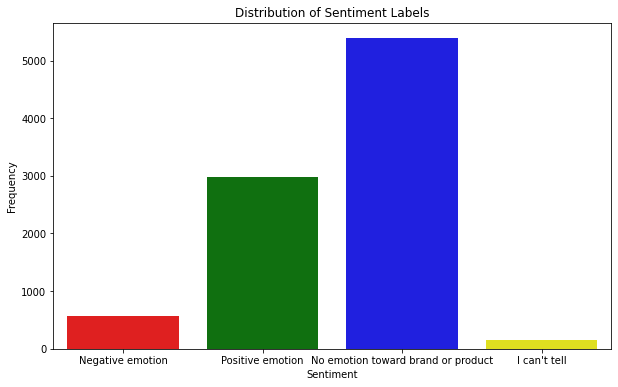

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot the distribution of sentiment labels
colors = ['red', 'green', 'blue', 'yellow']
sns.countplot(x='emotion', hue= 'emotion', palette = colors, data=df_tweets)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
# Show the plots
plt.show()


## Data Preparation and Preprocessing

### Mapping Sentiment Labels to Categories

Before mapping the sentiment labels, we removed rows where the sentiment is labeled as **"I can't tell"** to focus on meaningful sentiment analysis. After removing these irrelevant rows, we map the remaining sentiment labels to numeric categories as follows:

- **"Negative emotion"** → **0**
- **"Neutral emotion"** → **1**
- **"Positive emotion"** → **2**
- **"No emotion toward brand or product"** → **1** (treated as **neutral**)

This mapping ensures that we account for all relevant sentiment categories, with **"No emotion"** treated as **neutral**, making the dataset ready for sentiment classification.

In [9]:
# Drop rows where the 'emotion' column contains 'I can't tell'
df_tweets = df_tweets[df_tweets['emotion'] != "I can't tell"]

# Map sentiment values to numeric categories, treating 'No emotion' as neutral (1)
sentiment_map = {
    'Negative emotion': 0,
    'Neutral emotion': 1,
    'Positive emotion': 2,
    'No emotion toward brand or product': 1  # Treat this as neutral
}

# Apply the mapping to the 'emotion' column
df_tweets['sentiment_numeric'] = df_tweets['emotion'].map(sentiment_map)

# Verify the changes and check the distribution of sentiment categories
df_tweets['sentiment_numeric'].value_counts()


sentiment_numeric
1    5388
2    2978
0     570
Name: count, dtype: int64

### Data Cleaning

In this step, we create a function to clean the raw text data to remove noise and prepare it for further processing. The following operations are performed:

1. **Remove URLs**: We remove any links in the tweet, as they don’t contribute to the sentiment analysis.
2. **Remove Mentions and Hashtags**: We eliminate mentions (`@username`) and hashtags (`#hashtag`) to focus only on the content of the tweet.
3. **Remove Special Characters and Numbers**: We remove any non-alphabetic characters, keeping only letters.
4. **Convert to Lowercase**: All text is converted to lowercase to avoid case sensitivity issues during modeling.

Once cleaned, the `text` column is transformed into a new column called `cleaned_text` for further processing.


In [12]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# initializing the RegexpTokenizer, porterstemmer and stopwords
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")  # tokenizer that keeps 3+ letter words
stopwords_list = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Step 1: Remove URLs
    text = re.sub(r'http\S+|www\S+', " ", text)  # Remove any URL links starting with http or www
    # Step 2: Remove mentions, hashtags, and placeholders like {link} and {mention}
    text = re.sub(r'@\w+|#\w+|\{link\}|\{mention\}', " ", text)  # Remove usernames, hashtags, {link}, {mention}
    # Step 3: Remove special characters and numbers, keeping only alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', " ", text)  # Remove special characters, keeping only words
    # Step 4: Standardize case (lowercase the text)
    text = text.lower()
    
    # Step 5: Tokenize - Split text into tokens (words) based on the tokenizer rules
    tokens = tokenizer.tokenize(text)
    # Step 6: Remove stopwords using stopwords_list
    tokens = [word for word in tokens if word not in stopwords_list]  # Remove common stopwords
    # Step 7: Stem the tokenized text using stemmer
    tokens = [stemmer.stem(word) for word in tokens]  # Reduce words to their root form using stemming
    
    # Return the preprocessed text
    return tokens  # Returns the processed tokens (cleaned and stemmed)

# Apply function to the dataframe 
df_tweets['processed_tokens'] = df_tweets['text'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
df_tweets.head(5)


,text,target_device,emotion,sentiment_numeric,processed_tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,"[iphon, hr, tweet, dead, need, upgrad, plugin,..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,2,"[know, awesom, ipad, iphon, app, like, appreci..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,2,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,"[hope, year, festiv, crashi, year, iphon, app]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,2,"[great, stuff, fri, marissa, mayer, googl, tim..."


### Feature Extraction with TF-IDF

After preprocessing the text, the next step is to convert the cleaned and tokenized text into numerical vectors a format that machine learning models can use for training and predictions.

#### Steps:
1.  We initialize the `TfidfVectorizer`, which transforms the processed tokens into numerical vectors.
2. **Fit and Transform**: We apply the vectorizer to the `processed_tokens` column to obtain the TF-IDF features.
3. **Result**: The resulting matrix represents the importance of each word across all tweets.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the processed tokens back into a single string for each tweet
df_tweets['processed_text'] = df_tweets['processed_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF Vectorizer 
tfidf = TfidfVectorizer()

# Fit and transform the 'processed_text' column into TF-IDF features
X = tfidf.fit_transform(df_tweets['processed_text'])

# Display shape of the resulting matrix
print(X.shape)
df_tweets.head(5)



(8936, 5832)


,text,target_device,emotion,sentiment_numeric,processed_tokens,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,"[iphon, hr, tweet, dead, need, upgrad, plugin,...",iphon hr tweet dead need upgrad plugin station
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,2,"[know, awesom, ipad, iphon, app, like, appreci...",know awesom ipad iphon app like appreci design...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,2,"[wait, also, sale]",wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,"[hope, year, festiv, crashi, year, iphon, app]",hope year festiv crashi year iphon app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,2,"[great, stuff, fri, marissa, mayer, googl, tim...",great stuff fri marissa mayer googl tim reilli...


## Modeling 
### Decision Tree Classifier: First Model

With the text data already transformed into numerical features using **TF-IDF**, we now move to building our first classification model: the **Decision Tree Classifier**.

#### Steps:
**Train-Test Split**: We split the dataset into training (80%) and test (20%) sets to train and evaluate the model.
**Training the Decision Tree**: We initialize the **Decision Tree Classifier** and train it using the training set.
**Prediction and Evaluation**:
   - After training, we make predictions on the test set.
   - The performance of the model is evaluated using **accuracy** and a **classification report**, which provides precision, recall, and F1-score for each sentiment category (Negative, Neutral, Positive).

This will provide a baseline performance of the Decision Tree model, which can be compared to other models in subsequent steps.


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#splitting the data into training and test sets
X = tfidf.fit_transform(df_tweets['processed_text'])  #tfidf features
y = df_tweets['emotion'] #target - positive, neutral, negative

#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

#initialize the tree classifier
tree = DecisionTreeClassifier( random_state= 42)

#model training
tree.fit(X_train, y_train)

#make predictions
y_pred = tree.predict(X_test)

#make evaluations
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.6363297277135397
                                    precision    recall  f1-score   support

                  Negative emotion       0.36      0.21      0.27       189
No emotion toward brand or product       0.69      0.77      0.73      1612
                  Positive emotion       0.54      0.48      0.51       880

                          accuracy                           0.64      2681
                         macro avg       0.53      0.49      0.50      2681
                      weighted avg       0.62      0.64      0.63      2681



### Model Performance

The **Decision Tree Classifier** achieved an accuracy of **63.63%**. Performance for each sentiment class:

- **Negative emotion**: Precision of **0.36** and recall of **0.21**, resulting in an F1-score of **0.27**. The model struggles to identify negative emotions, missing many relevant samples.
  
- **Neutral emotion**: Precision of **0.69** and recall of **0.77**, with an F1-score of **0.73**. The model is highly effective at identifying neutral sentiments, likely due to their higher frequency in the dataset.

- **Positive emotion**: Precision of **0.54** and recall of **0.48**, leading to an F1-score of **0.51**. The model shows moderate performance in identifying positive emotions.

### Next Steps:
1. **Hyperparameter Tuning**: Further refine the model to boost performance.
2. **Handle Class Imbalance**: Implement strategies like `class_weight='balanced'` to improve results for minority classes.


best performers: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy after tuning and class weighting: 0.618425960462514
                                    precision    recall  f1-score   support

                  Negative emotion       0.27      0.30      0.29       189
No emotion toward brand or product       0.73      0.69      0.71      1612
                  Positive emotion       0.52      0.56      0.54       880

                          accuracy                           0.62      2681
                         macro avg       0.51      0.52      0.51      2681
                      weighted avg       0.63      0.62      0.62      2681



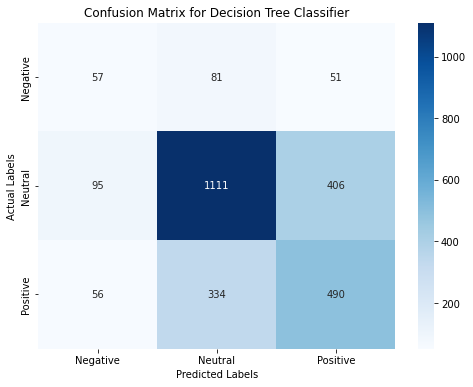

In [16]:
from sklearn.model_selection import GridSearchCV
#defining parameters
param_grid = {
    'max_depth': [5, 10, None],  
    'min_samples_split': [2, 10], 
    'min_samples_leaf': [1, 5], 
    'criterion': ['gini'], 
    'class_weight': [ 'balanced'] # Adding class_weight to deal with imbalance
    }

#initialize the gridsearch CV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring = 'accuracy')

#fit the gridsearchCV on training data
grid_search.fit(X_train, y_train)

#get the best performers
print("best performers:", grid_search.best_params_)

#evaluate the best parameters
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)

# Print the new accuracy and classification report
print(f"Accuracy after tuning and class weighting: {accuracy_score(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best)) 


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best, labels=['Negative emotion', 'No emotion toward brand or product', 'Positive emotion'])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Hyperparameter Tuning Results with GridSearchCV

#### Performance After Tuning:
- **Negative emotion**: Precision dropped to **0.27** (previous: 0.36), recall improved to **0.30** (previous: 0.21), and F1-score stabilized at **0.29** (previous: 0.27).
- **Neutral emotion**: F1-score slightly decreased to **0.71** (previous: 0.73), with precision improving to **0.73** (previous: 0.69) and recall at **0.69** (previous: 0.77).
- **Positive emotion**: Precision held steady at **0.52** (previous: 0.54), recall improved to **0.56** (previous: 0.48), resulting in an F1-score of **0.54** (previous: 0.51).


### Model 2: XGBoost (Extreme Gradient Boosting)

After evaluating the **Decision Tree** model, we observed that while it provided decent results, there are some limitations. 
#### Why XGBoost?
XGBoost is an advanced ensemble learning algorithm based on **Gradient Boosting**. It builds multiple decision trees sequentially, where each tree attempts to correct the errors of the previous one. This boosting technique helps the model generalize better and reduces overfitting, making XGBoost more powerful than a standard Decision Tree.

In the next step, we will build the XGBoost model using the same **TF-IDF features** that we used for the Decision Tree and evaluate its performance on the test set.


Accuracy: 0.6795302013422819
              precision    recall  f1-score   support

           0       0.55      0.13      0.22       126
           1       0.70      0.88      0.78      1094
           2       0.61      0.42      0.50       568

    accuracy                           0.68      1788
   macro avg       0.62      0.48      0.50      1788
weighted avg       0.66      0.68      0.65      1788



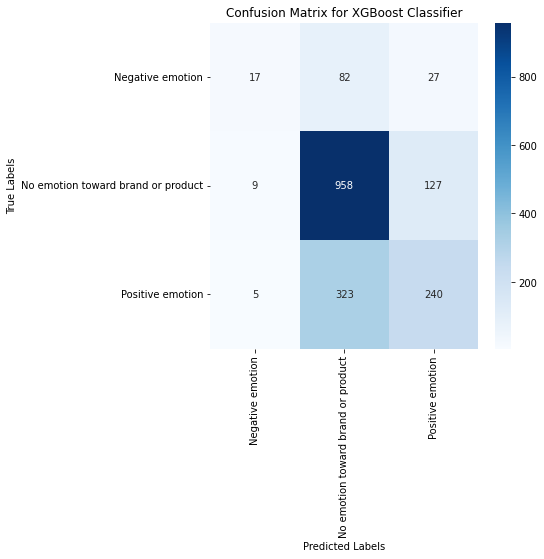

In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = tfidf.fit_transform(df_tweets['processed_text'])
y = le.fit_transform(df_tweets['emotion'])

#perform test_train_split and flatten y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### XGBoost Model Performance

#### Performance After Training:
-  **Overall Accuracy**: The model improved its overall accuracy to **0.68** (previous: 0.66), indicating a better general performance.
- **Negative emotion**: Precision improved to **0.55** (previous: 0.53), but recall remained low at **0.13** (same as previous).
- **Neutral emotion**: The model continues to correctly identify neutral sentiments at a high rate.Stable performance with an F1-score of **0.78** (same as previous), with precision of **0.70** (same as previous) 

- **Positive emotion**: Precision remained consistent at **0.61** (previous: 0.62), while recall slightly decreased to **0.42** (previous: 0.43).



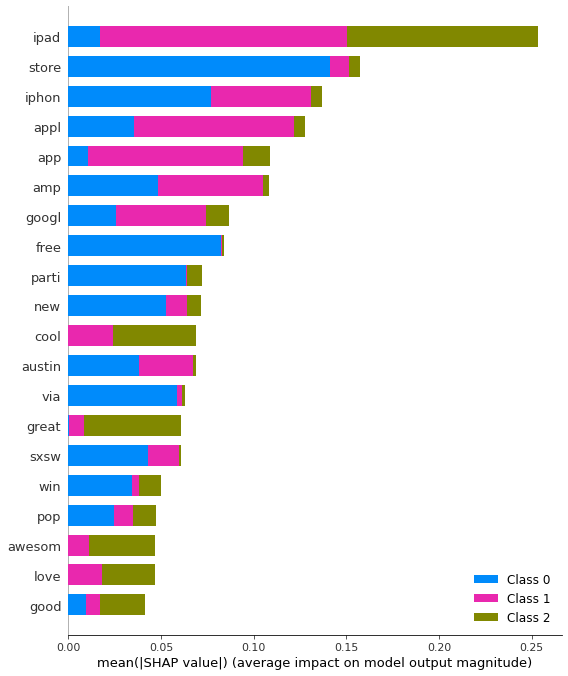

In [18]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary (shows feature impact across the entire dataset)
shap.summary_plot(shap_values, X_test, feature_names=tfidf.get_feature_names_out())

#### Feature Importance Interpretation

The feature importance plot above shows the most influential words driving predictions across the three sentiment classes:

- **Class 0 (Negative)**: Words like "store," "iphon," and "googl" play a significant role in negative sentiment predictions. These words might be associated with complaints or issues related to these products and services.
  
- **Class 1 (Neutral)**: Words such as "ipad," "appl," and "amp" influence predictions toward neutral sentiment. These words are frequently mentioned in tweets without a strong positive or negative emotion, indicating their neutral context.

- **Class 2 (Positive)**: Positive sentiment predictions are heavily influenced by words like "ipad," "great," and "awesome," which often appear in tweets expressing satisfaction or excitement about products or experiences.

The length of each bar represents the importance of the word in the prediction. Notably, words like "ipad" and "iphon" are influential across multiple classes, indicating their frequent presence in the dataset and their contribution to different sentiment predictions depending on the context.
